In [ ]:
!pip install kaggle

!pip install -U scikit-learn

In [ ]:
import zipfile
from google.colab import files


uploaded = files.upload() #Upload kaggle.json file

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d athirags/car-data


with zipfile.ZipFile("/content/car-data.zip", "r") as zip_ref:
    zip_ref.extractall("/content/car-data")

Mounted at /content/drive
Dataset URL: https://www.kaggle.com/datasets/athirags/car-data
License(s): CC0-1.0
  0% 0.00/3.77k [00:00<?, ?B/s]
100% 3.77k/3.77k [00:00<00:00, 8.63MB/s]


In [1]:
import pandas as pd


file_path = "/content/car-data/cardata.csv"
df = pd.read_csv(file_path)


df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [2]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
duplicates = df[df.duplicated(keep=False)]
# Original number of instances
original_instances = len(df)
print(f"Original number of instances: {original_instances}")

print(duplicates)

Original number of instances: 301
    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
15    ertiga  2016           7.75          10.79       43000    Diesel   
17    ertiga  2016           7.75          10.79       43000    Diesel   
51  fortuner  2015          23.00          30.61       40000    Diesel   
93  fortuner  2015          23.00          30.61       40000    Diesel   

   Seller_Type Transmission  Owner  
15      Dealer       Manual      0  
17      Dealer       Manual      0  
51      Dealer    Automatic      0  
93      Dealer    Automatic      0  


In [5]:
df.drop_duplicates(inplace=True)
final_instances = len(df)
print(f"Number of instances after removing duplicates: {final_instances}")

Number of instances after removing duplicates: 299


In [6]:
# Calculate missing values per column
missing_values = df.isnull().sum()

# Display the results
print("Missing Values per Column:\n", missing_values)

Missing Values per Column:
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.567887,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


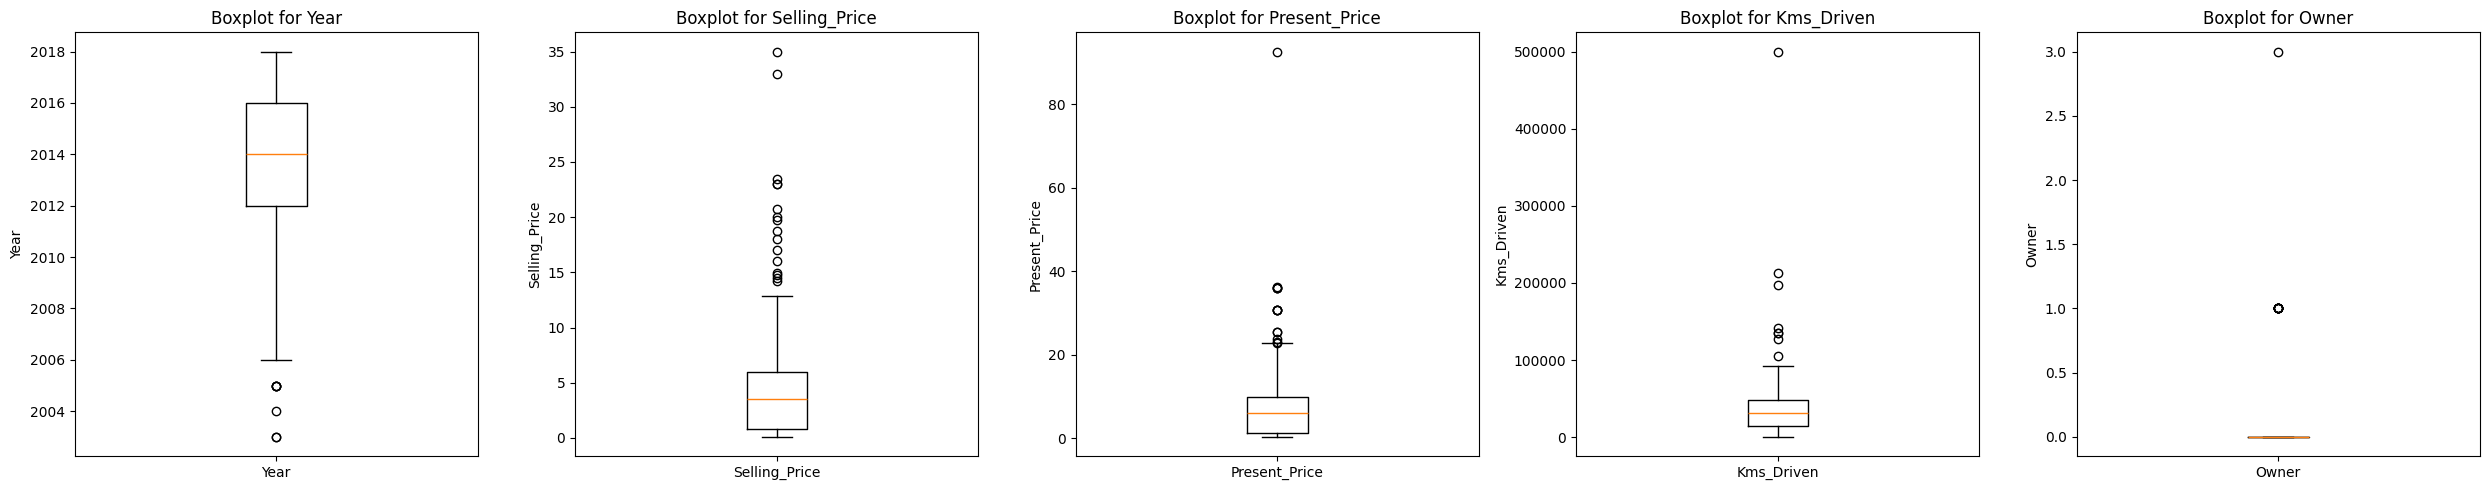

In [8]:
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include=['number'])

num_cols = len(numeric_columns.columns)
fig, axes = plt.subplots(1, num_cols, figsize=(5 * num_cols, 5), tight_layout=True)

for ax, col in zip(axes, numeric_columns.columns):
    ax.boxplot(df[col], labels=[col])
    ax.set_title(f'Boxplot for {col}')
    ax.set_ylabel(col)
    if col in ['Year', 'Kms_Driven']:
      ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

plt.show()

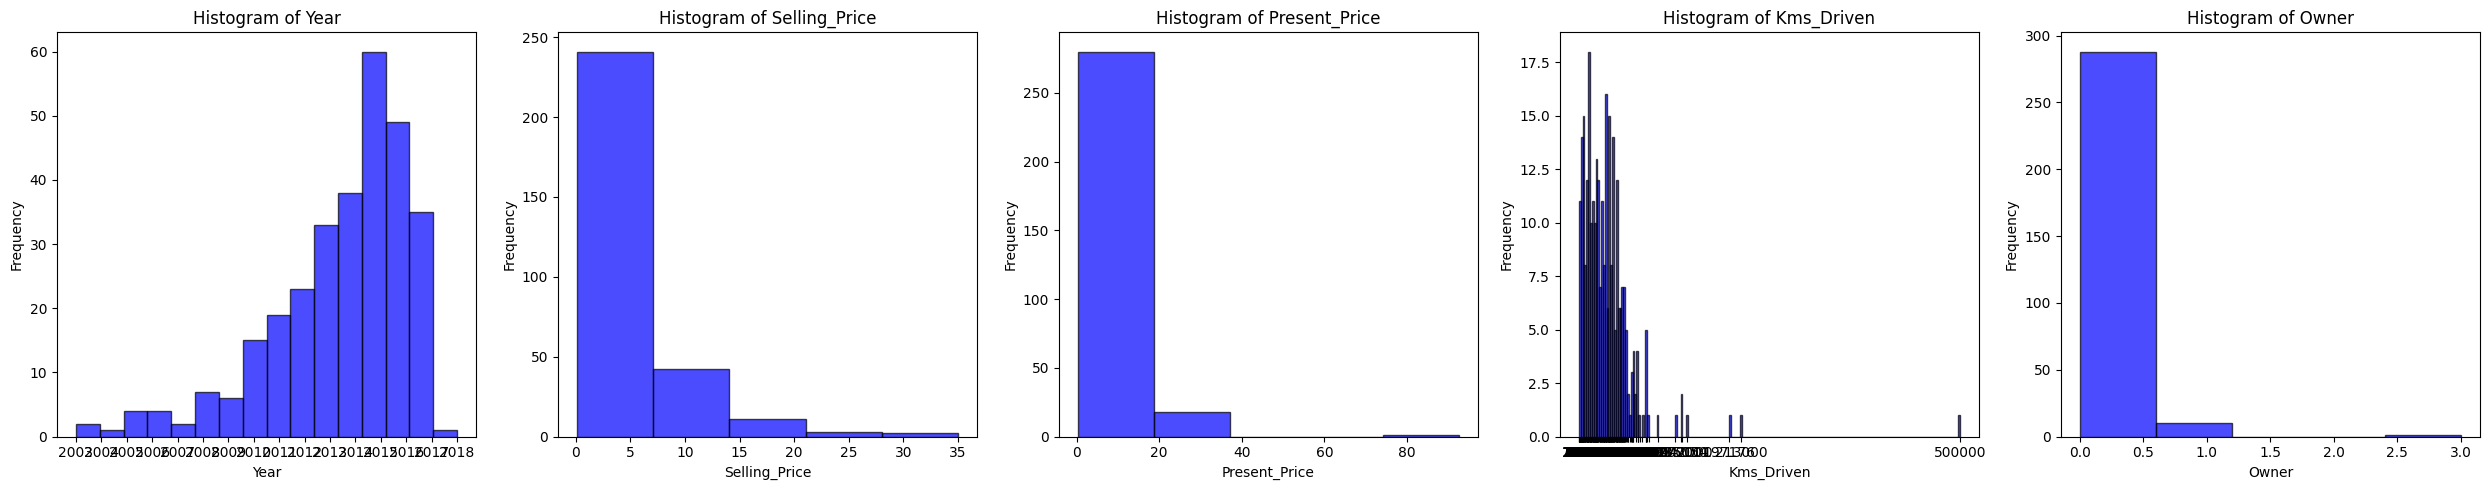

In [ ]:
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include=['number'])

num_cols = len(numeric_columns.columns)
fig, axes = plt.subplots(1, num_cols, figsize=(5 * num_cols, 5), tight_layout=True)

for ax, col in zip(axes, numeric_columns.columns):
    if col == 'Year':
        unique_values = sorted(df[col].unique())
        ax.hist(df[col], bins=len(unique_values), alpha=0.7, color='blue', edgecolor='black')
        ax.set_xticks(unique_values)
    elif col == 'Kms_Driven':
        unique_values = sorted(df[col].unique())
        ax.hist(df[col], bins=len(unique_values), alpha=0.7, color='blue', edgecolor='black')
        ax.set_xticks(unique_values)
    else:
        ax.hist(df[col], bins=5, alpha=0.7, color='blue', edgecolor='black')
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.show()

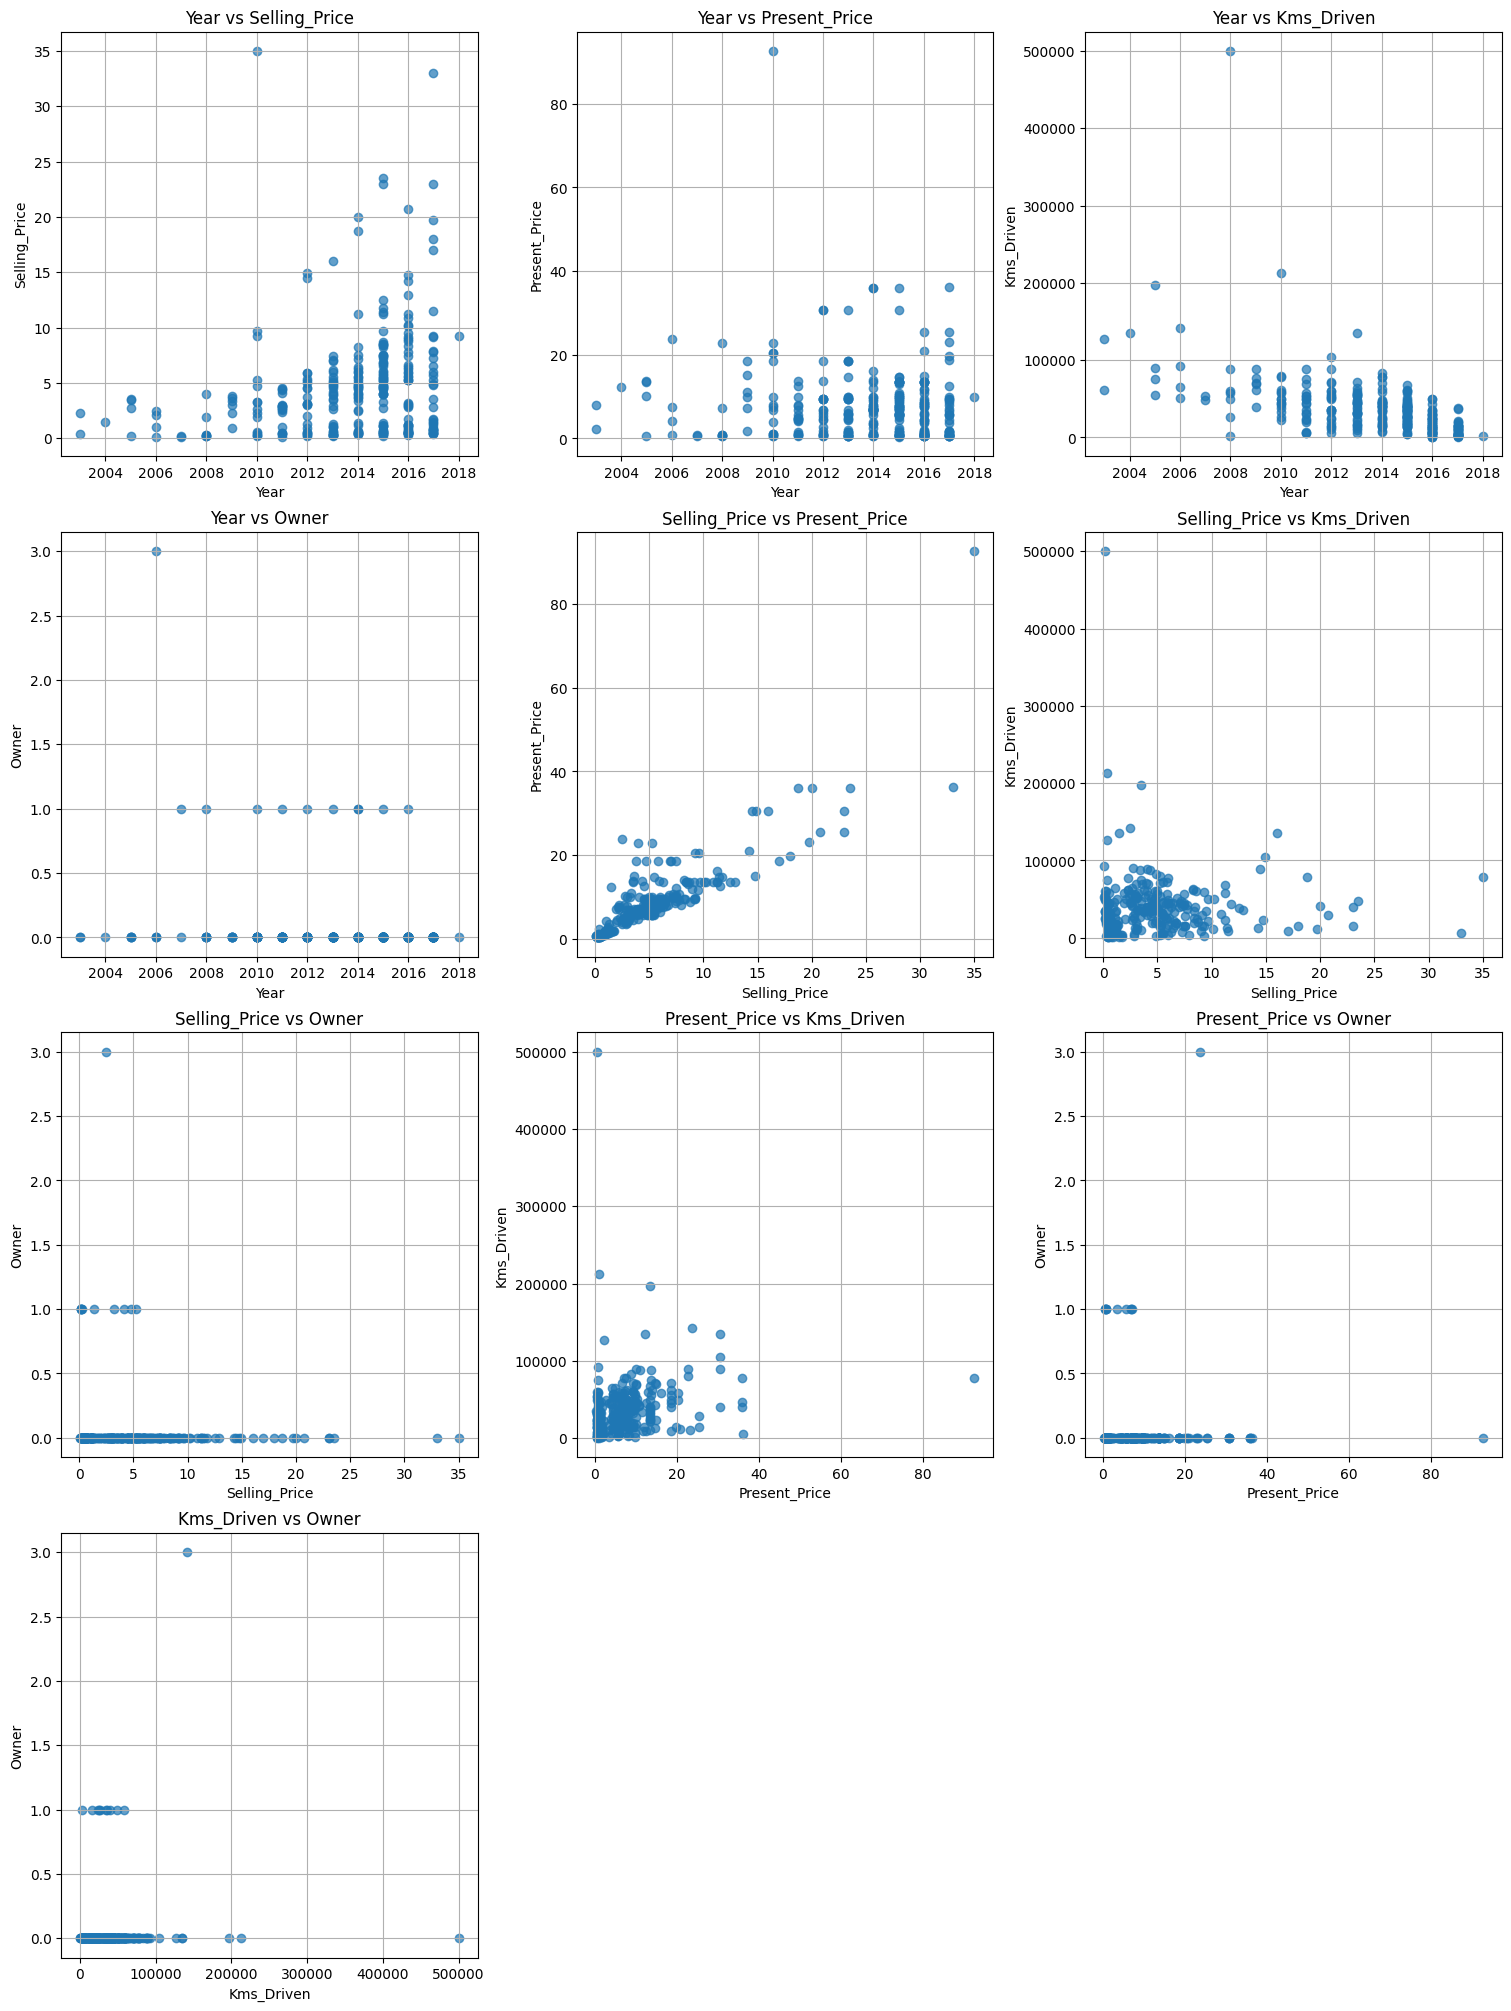

In [ ]:
import itertools
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include=['number']).columns

num_combinations = len(list(itertools.combinations(numeric_columns, 2)))
num_cols = 3
num_rows = (num_combinations // num_cols) + (num_combinations % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), constrained_layout=True)
axes = axes.flatten()

for idx, (col1, col2) in enumerate(itertools.combinations(numeric_columns, 2)):
    ax = axes[idx]
    ax.scatter(df[col1], df[col2], alpha=0.7)
    ax.set_title(f'{col1} vs {col2}')
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    ax.grid(True)

for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.show()

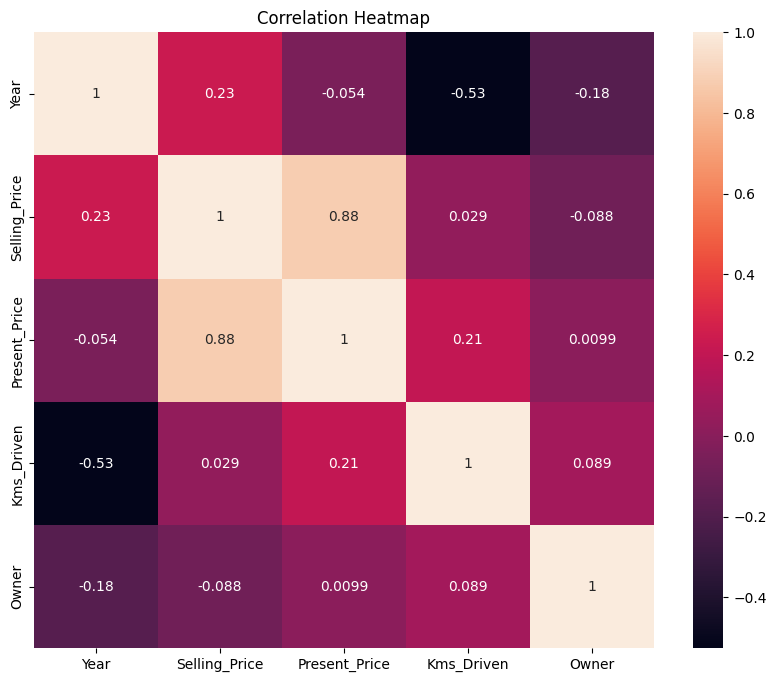

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

numerical_data = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [9]:
current_year = 2024
df['Car_Age'] = current_year - df['Year']
df = df.drop(columns=['Year'])
df = df.drop(columns=['Car_Name'])

In [10]:
df = pd.get_dummies(df, columns=['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['Selling_Price', 'Kms_Driven', 'Owner', 'Car_Age']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Present_Price'])  # Features
y = df['Present_Price']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
non_numeric_columns = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index([], dtype='object')


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_predict
import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

for model_name, model in models.items():
    # Generate cross-validated predictions
    y_pred = cross_val_predict(model, X_train, y_train, cv=10)

    # Calculate metrics
    r2 = r2_score(y_train, y_pred)
    mae = mean_absolute_error(y_train, y_pred)
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))

    # Print results
    print(f"{model_name}:\n")
    print(f"  R²: {r2:.2f}\n")
    print(f"  Mean Absolute Error (MAE): {mae:.2f}\n")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}\n")


Linear Regression:

  R²: 0.83

  Mean Absolute Error (MAE): 1.90

  Root Mean Squared Error (RMSE): 3.66

Random Forest:

  R²: 0.78

  Mean Absolute Error (MAE): 1.21

  Root Mean Squared Error (RMSE): 4.13

Decision Tree:

  R²: 0.74

  Mean Absolute Error (MAE): 1.35

  Root Mean Squared Error (RMSE): 4.52

K-Nearest Neighbors:

  R²: 0.73

  Mean Absolute Error (MAE): 1.80

  Root Mean Squared Error (RMSE): 4.58



#**Project Logs**

---



### Step 2 (Splitting the data)
**Random State = 42**

Linear Regression:
- Mean Squared Error (MSE): 8.3888664470952e+22
- R² Score: -1.5354177386713493e+21

Random Forest Regressor:
- Mean Squared Error (MSE): 15.142492170048365
- R² Score: 0.72284633171583

Decision Tree Regressor:
- Mean Squared Error (MSE): 61.43846948333332
- R² Score: -0.12451087970524477

MLP Regressor:
- Mean Squared Error (MSE): 28.474438681004013
- R² Score: 0.4788311564471015

K-Nearest Neighbors Regressor:
- Mean Squared Error (MSE): 14.264037857999995
- R² Score: 0.7389247177747527

---------------------------------------------------

**Random State = 0**

Linear Regression:
- Mean Squared Error (MSE): 1.628288659661818e+23
- R² Score: -3.7547962236100265e+21

Random Forest Regressor:
- Mean Squared Error (MSE): 2.5850603536800003
- R² Score: 0.940389102410026

Decision Tree Regressor:
- Mean Squared Error (MSE): 3.507267150000001
- R² Score: 0.9191232256524675

MLP Regressor:
- Mean Squared Error (MSE): 24.84335044855686
- R² Score: 0.4271180488020129

K-Nearest Neighbors Regressor:
- Mean Squared Error (MSE): 4.604251632
- R² Score: 0.8938270156350872

---------------------------------------------------

### Step 2 (Splitting the data with Stratify = Present_Price, Random State = 0)

Linear Regression:
- Mean Squared Error (MSE): 1.0348032252000179e+22
- R² Score: -1.8662548024896733e+20

Random Forest Regressor:
- Mean Squared Error (MSE): 2.3144819852816654
- R² Score: 0.958258604002004

Decision Tree Regressor:
- Mean Squared Error (MSE): 3.5884619333333343
- R² Score: 0.9352825333981709

MLP Regressor:
- Mean Squared Error (MSE): 24.71792486980054
- R² Score: 0.5542152858392213

K-Nearest Neighbors Regressor:
- Mean Squared Error (MSE): 3.4331985113333325
- R² Score: 0.9380826899873861

---------------------------------------------------

**Removed Stratify, Test Size = 0.15, Random State = 0**

Linear Regression:
- Mean Squared Error (MSE): 7.636256320936753e+20
- R² Score: -1.5800735844837607e+19

Random Forest Regressor:
- Mean Squared Error (MSE): 2.4487610385577763
- R² Score: 0.9493308963303171

Decision Tree Regressor:
- Mean Squared Error (MSE): 3.858773333333334
- R² Score: 0.9201553018094291

MLP Regressor:
- Mean Squared Error (MSE): 23.804609706574922
- R² Score: 0.5074414293404612

K-Nearest Neighbors Regressor:
- Mean Squared Error (MSE): 4.832168353777778
- R² Score: 0.9000140742964737

---------------------------------------------------

**Re-added Stratify and Random State = 42**

Linear Regression:
- Mean Squared Error (MSE): 2.191627877313519e+24
- R² Score: -4.149173625748915e+22

Random Forest Regressor:
- Mean Squared Error (MSE): 11.703277175078366
- R² Score: 0.7784344254226789

Decision Tree Regressor:
- Mean Squared Error (MSE): 57.25670481666666
- R² Score: -0.08397968460692007

MLP Regressor:
- Mean Squared Error (MSE): 29.87512473772462
- R² Score: 0.4344063565222047

K-Nearest Neighbors Regressor:
- Mean Squared Error (MSE): 1.4978218866666653
- R² Score: 0.9716433472463183

---------------------------------------------------

**Min-Max Normalization, All Columns Used**

Linear Regression:
- Mean Squared Error (MSE): 2.191627877313519e+24
- R² Score: -4.149173625748915e+22

Random Forest Regressor:
- Mean Squared Error (MSE): 11.703277175078366
- R² Score: 0.7784344254226789

Decision Tree Regressor:
- Mean Squared Error (MSE): 57.25670481666666
- R² Score: -0.08397968460692007

MLP Regressor:
- Mean Squared Error (MSE): 29.87512473772462
- R² Score: 0.4344063565222047

K-Nearest Neighbors Regressor:
- Mean Squared Error (MSE): 1.4978218866666653
- R² Score: 0.9716433472463183
